# Shapely and geometric objects

**Sources:**

These materials are partly based on [Shapely-documentation](https://shapely.readthedocs.io/en/stable/manual.html) and [Westra
E. (2013), Chapter 3](https://www.packtpub.com/application-development/python-geospatial-development-second-edition).

## Spatial data model

![Spatial data model](img/SpatialDataModel.PNG)

*Fundamental geometric objects that can be used in Python with* [Shapely](http://toblerity.org/shapely/manual.html).

The most fundamental geometric objects are `Points`, `Lines` and `Polygons` which are the basic ingredients when working with spatial data in vector format. 
Python has a specific module called [Shapely](http://toblerity.org/shapely/manual.html) for doing various geometric operations. 
There are many useful functionalities that you can do with Shapely such as:

-  Create a `Line` or `Polygon` from a `Collection` of `Point` -geometries
-  Calculate areas/length/bounds etc. of input geometries
-  Conduct geometric operations based on the input geometries such as `Union`, `Difference`, `Distance` etc.
-  Conduct spatial queries between geometries such as `Intersects`, `Touches`, `Crosses`, `Within` etc.

**Geometric Objects consist of coordinate tuples where:**

-  `Point` -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
-  `LineString` -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
-  `Polygon` -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

**It is also possible to have a collection of geometric objects (e.g. Polygons with multiple parts):**

-  `MultiPoint` -object represents a collection of points and consists of a list of coordinate-tuples
-  `MultiLineString` -object represents a collection of lines and consists of a list of line-like sequences
-  `MultiPolygon` -object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples


<div class="alert alert-info">

**Tuple**

[Tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) is a Python data structure that consists of a nuber of values separated by commas. Coordinate pairs are often represented as a tuple. For example:

```
(60.192059, 24.945831)
``` 

Tuples belong to [sequence data types](https://docs.python.org/3/library/stdtypes.html#typesseq) in Python. Other sequence data types are lists and ranges. Tuples have many similarities with lists and ranges, but they are often used for different purposes. The main difference between tuples and lists is that tuples are [immutable](https://docs.python.org/3/glossary.html#term-immutable), which means that the contents of a tuple cannot be altered (while lists are mutable; you can, for example, add and remove values from lists).
</div>



## Point

-  Creating point is easy, you pass x and y coordinates into `Point()` -object (+ possibly also z -coordinate):

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

- Let's see what the variables look like:

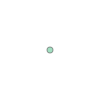

In [2]:
point1

Jupyter notebook is able to display the shape directly on the screen.
- We can also print out the points to see the actual definition:

In [3]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


3D-point can be recognized from the capital Z -letter in front of the coordinates.

- Let's also check the data type of a point:

In [4]:
type(point1)

shapely.geometry.point.Point

We can see that the type of the point is shapely's Point which is represented in a specific format that is based on
[GEOS](https://trac.osgeo.org/geos) C++ library that is one of the standard libraries in GIS. It runs under the hood e.g. in [QGIS](http://www.qgis.org/en/site/). 

- We can also access the geometry type of the object using `Point.geom_type`:

In [5]:
point1.geom_type

'Point'

### Point attributes and functions

Points and other shapely objects have useful built-in [attributes and methods](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). One of the most useful ones are the ability to extract the coordinates of a Point and calculate the Euclidian distance between points.

-  Extracting the coordinates of a Point can be done in a couple of different ways:

In [6]:
# Get the coordinates
point_coords = point1.coords
print(point_coords)

In [7]:
# What is the data type?
type(point_coords)

shapely.coords.CoordinateSequence

As we can see, the data type of our `point_coords` variable is a Shapely CoordinateSequence.

- Let's see how we can get out the actual coordinates from this object:

In [8]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

- Print out the coordinates:

In [9]:
print("xy:", xy, "\n")
print("x:", x, "\n")
print("y:", y)

xy: (array('d', [2.2]), array('d', [4.2])) 

x: 2.2 

y: 4.2


As we can see from above the `xy` -variable contains a tuple where x and y coordinates are stored inside numpy arrays.
Using the attributes `point1.x` and `point1.y` it is possible to get the coordinates directly as plain decimal numbers.

It is also possible to [calculate the distance between two objects using shapely](https://shapely.readthedocs.io/en/stable/manual.html#object.distance). The returned distance is based on the projection of the points (e.g. degrees in WGS84, meters in UTM).

- Let's calculate the distance between `point1` and `point2`:

In [10]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


## LineString


Creating LineString -objects is fairly similar to creating Shapely Points. 

- Now instead using a single coordinate-tuple we can construct the line using either a list of shapely Point -objects or pass the points as coordinate-tuples:

In [11]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

- Let's see how our line looks like: 

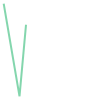

In [12]:
line

In [13]:
print("line: \n", line, "\n")
print("line2: \n", line2, "\n")

line: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

line2: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 



As we can see from above, the `line` -variable constitutes of multiple coordinate-pairs.

- Check also the data type:

In [14]:
print("Object data type:", type(line))
print("Geometry type as text:", line.geom_type)

Object data type: <class 'shapely.geometry.linestring.LineString'>
Geometry type as text: LineString


### LineString attributes and functions


`LineString` -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from [Shapely documentation](http://toblerity.org/shapely/manual.html). Here, we go through a few of them.

-  We can extract the coordinates of a LineString similarly as with `Point`


In [15]:
# Get x and y coordinates of the line
lxy = line.xy

In [16]:
print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


As we can see, the coordinates are again stored as a numpy arrays where first array includes all x-coordinates and the second one all the y-coordinates respectively.

-  We can extract only x or y coordinates by referring to those arrays as follows


In [17]:
# Extract x coordinates
line_xcoords = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_ycoords = line.xy[1]

In [18]:
print('line_x:\n', line_xcoords, '\n')

print('line_y:\n', line_ycoords)

line_x:
 array('d', [2.2, 7.2, 9.26]) 

line_y:
 array('d', [4.2, -25.1, -2.456])


-  It is possible to retrieve specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself:

In [19]:
# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# What type is the centroid?
centroid_type = type(l_centroid)

In [20]:
# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


Nice! These are already fairly useful information for many different GIS tasks, and we didn't even calculate anything yet! These attributes are built-in in every LineString object that is created. 

Notice that the centroid that is returned is `Point` -object that has its own functions as was described earlier.

## Polygon


Creating a `Polygon` -object continues the same logic of how `Point` and `LineString` were created but Polygon object only accepts coordinate-tuples as input. 

- Polygon needs at least three coordinate-tuples (that basically forms a triangle):


In [21]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

- Let's see how our Polygon looks like

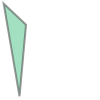

In [22]:

poly

In [23]:
print('poly:', poly)
print('poly2:', poly2)

poly: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
poly2: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Notice that `Polygon` representation has double parentheses around the coordinates (i.e. `POLYGON ((<values in here>))` ). This is because Polygon can also have holes inside of it. 

- Check also the data type:

In [24]:
print("Object data type:", type(poly))
print("Geometry type as text:", poly.geom_type)

Object data type: <class 'shapely.geometry.polygon.Polygon'>
Geometry type as text: Polygon


In [25]:
# Check the help for Polygon objects:
#help(Polygon)



As the help of Polygon -object tells, a Polygon can be constructed using exterior coordinates and interior coordinates (optional) where the interior coordinates creates a hole inside the Polygon:


```
Help on Polygon in module shapely.geometry.polygon object:
     class Polygon(shapely.geometry.base.BaseGeometry)
      |  A two-dimensional figure bounded by a linear ring
      |
      |  A polygon has a non-zero area. It may have one or more negative-space
      |  "holes" which are also bounded by linear rings. If any rings cross each
      |  other, the feature is invalid and operations on it may fail.
      |
      |  Attributes
      |  ----------
      |  exterior : LinearRing
      |      The ring which bounds the positive space of the polygon.
      |  interiors : sequence
      |      A sequence of rings which bound all existing holes.
      
```

-  Let's see how we can create a `Polygon` with a hole inside; lLet's create a bounding box of the world and make a whole in it:

In [26]:
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

-  Let's see what we have now:

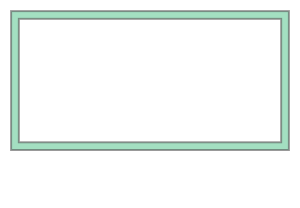

In [27]:
world_has_a_hole

In [28]:
print('world:', world)
print('world_has_a_hole:', world_has_a_hole)
print('type:', type(world_has_a_hole))

world: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
world_has_a_hole: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
type: <class 'shapely.geometry.polygon.Polygon'>


As we can see the `Polygon` has now two different tuples of coordinates. The first one represents the **outerior** and the second one represents the **hole** inside of the Polygon.

### Polygon attributes and functions


We can again access different attributes directly from the `Polygon` object itself that can be really useful for many analyses, such as `area`, `centroid`, `bounding box`, `exterior`, and `exterior-length`.

- Here, we can see a few of the available attributes and how to access them:

In [29]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

In [30]:
# Print the outputs
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


As we can see above, it is again fairly straightforward to access different attributes from the `Polygon` -object. Notice, that the extrerior lenght is given here with decimal degrees because we passed latitude and longitude coordinates into our Polygon. 

## Geometry collections (optional)


In some occassions it is useful to store e.g. multiple lines or polygons under a single feature (i.e. a single row in a Shapefile represents more than one line or polygon object). Collections of points are implemented by using a MultiPoint -object, collections of curves by using a MultiLineString -object, and collections of surfaces by a MultiPolygon -object. These collections are not computationally significant, but are useful for modeling certain kinds of features. A Y-shaped line feature
(such as road), or multiple polygons (e.g. islands on a like), can be presented nicely as a whole by a using MultiLineString or MultiPolygon accordingly. Creating and visualizing a minimum [bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box) e.g. around your data points is a really useful function for many purposes (e.g. trying to understand the extent of your data), here we demonstrate how to create one using Shapely.

-  Geometry collections can be constructed in a following manner:

In [31]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

# Print outputs
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


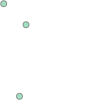

In [32]:
multi_point

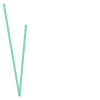

In [33]:
multi_line

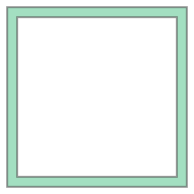

In [34]:
west_poly

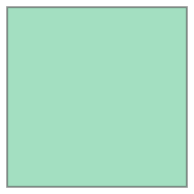

In [35]:
east_poly_box

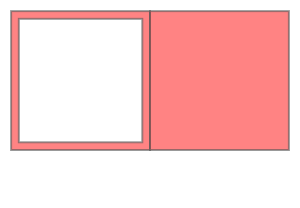

In [36]:
multi_poly

We can see that the outputs are similar to the basic geometric objects that we created previously but now these objects contain multiple features of those points, lines or polygons.

### Geometry collection -objects' attributes and functions

-  We can also get many useful attributes from those objects such as `Convex Hull`:

In [37]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull

# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

# We can also access different items inside our geometry collections. We can e.g. access a single polygon from
# our MultiPolygon -object by referring to the index

# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

# We can check if we have a "valid" MultiPolygon. MultiPolygon is thought as valid if the individual polygons 
# does notintersect with each other. Here, because the polygons have a common 0-meridian, we should NOT have 
# a valid polygon. This can be really useful information when trying to find topological errors from your data
valid = multi_poly.is_valid

# Print outputs
print("Convex hull of the points: ", convex)
print("Number of lines in MultiLineString:", lines_count)
print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western Hemisphere polygon:", west_area)
print("Is polygon valid?: ", valid)

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))
Number of lines in MultiLineString: 2
Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0
Is polygon valid?:  False


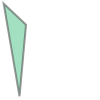

In [38]:
convex

From the above we can see that MultiPolygons have exactly the same attributes available as single geometric objects but now the information such as area calculates the area of **ALL** of the individual -objects combined. There are also some extra features available such as **is_valid** -attribute that tells if the polygons or lines intersect with each other.